In [1]:
import pandas as pd 
import matplotlib.pyplot as plt


In [2]:
df = pd.read_excel('DonneesGPS2025.xlsx'  ,sheet_name = 'ClosePrice')

df = df[[
    'ASX200' ,
    'EUROSTOXX50' , 
    'FTSE100',	
    'SP500'	,
    'TOPIX' , 
    'Date'
]]

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

df = df.set_index('Date')


In [3]:
df.loc['2010-06-01']

ASX200         4413.10
EUROSTOXX50    2606.58
FTSE100        5163.30
SP500          1070.71
TOPIX           880.04
Name: 2010-06-01 00:00:00, dtype: float64

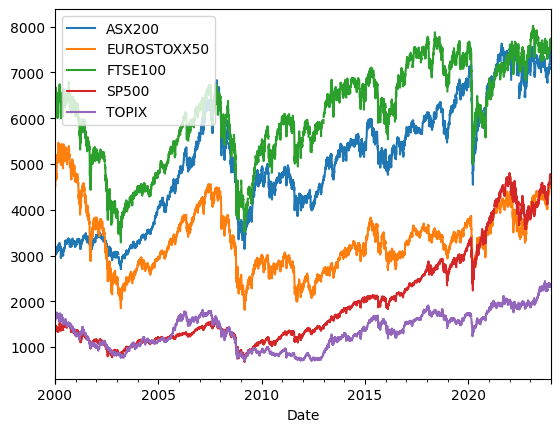

In [13]:

df["ASX200"].plot()
df["EUROSTOXX50"].plot()
df["FTSE100"].plot()
df["SP500"].plot()
df["TOPIX"].plot()
# ajouter une legende
plt.legend()
plt.show()


In [15]:

# Définir les dates spécifiques (T0, T1, T2, T3, T4, Tc)
dates_cibles = {
    'T0': '01-05-2009',
    'T1': '01-04-2010',
    'T2': '01-04-2011',
    'T3': '01-04-2012',
    'T4': '01-04-2013',
    'Tc': '01-06-2014'
}

# Convertir les dates cibles en format datetime
dates_cibles = {key: pd.to_datetime(value) for key, value in dates_cibles.items()}

# Sélectionner les lignes du DataFrame en utilisant les dates cibles
df = df.loc[dates_cibles.values()]

# Filtrer les données pour ces dates spécifiq

df.head()
     



,ASX200,EUROSTOXX50,FTSE100,SP500,TOPIX
Date,,,,,
2009-01-05,3687.0,2553.41,4579.64,927.45,875.91
2010-01-04,4876.3,3017.80,5500.34,1132.99,915.75
2011-01-04,4742.5,2844.17,6013.87,1270.20,911.80
2012-01-04,4187.8,2349.89,5668.45,1277.30,742.99
2013-01-04,4723.8,2709.35,6089.84,1466.47,888.51


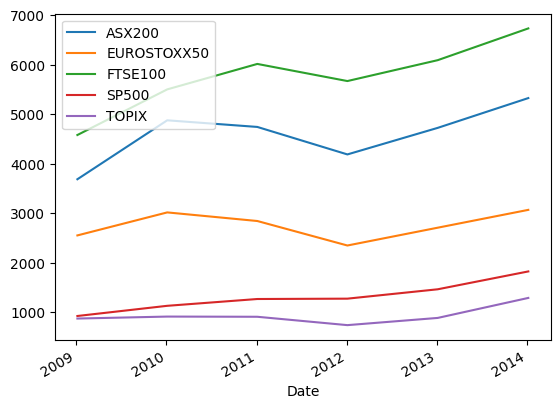

In [16]:
df["ASX200"].plot()
df["EUROSTOXX50"].plot()
df["FTSE100"].plot()
df["SP500"].plot()
df["TOPIX"].plot()
# ajouter une legende
plt.legend()
plt.show()


### Calcul de Performance : 

In [28]:
def calcul_perf(indices, date , date0 , df ):
    """
    Fonction pour calculer la performance d'un indice boursier entre deux dates.
    
    Args:
        indices (str): Nom de la colonne de l'indice boursier dans le DataFrame.
        date (str): Nom de la colonne pour stocker la performance calculée.
    
    return:
        - indice (str): Nom de l'indice boursier de performance le plus élevé.
        - perf (float): Valeur de performance la plus élevée.
    """
    perfs  = []
    for indice in indices : 
        perf = (df[indice].loc[date] - df[indice].loc[date0]) / df[indice].loc[date0]
        perfs.append({"indice": indice, "perf" : perf})

    perf_max = max([perf["perf"] for perf in perfs])
    
    # j'ai une lisrte de dict de la forma {name , value} , je vais le dict de value max 
    indice_max = [perf["indice"] for perf in perfs if perf["perf"] == perf_max][0]

    return indice_max, perf_max

def calcul_perf_min(indices, date2 , date1 , df ):
    """
    Fonction pour calculer la performance d'un indice boursier entre deux dates.
    
    Args:
        indices (str): Nom de la colonne de l'indice boursier dans le DataFrame.
        date (str): Nom de la colonne pour stocker la performance calculée.
    
    return:
        - indice (str): Nom de l'indice boursier de performance le plus bas.
        - perf (float): Valeur de performance la plus bas.
    """
    perfs  = []
    for indice in indices : 
        perf = (df[indice].loc[date2] - df[indice].loc[date1]) / df[indice].loc[date1]
        perfs.append({"indice": indice, "perf" : perf})

    perf_min = min([perf["perf"] for perf in perfs])
    
    # j'ai une lisrte de dict de la forma {name , value} , je vais le dict de value max 
    indice_min = [perf["indice"] for perf in perfs if perf["perf"] == perf_min][0]

    return indice_min, perf_min



def calcul_payoff(V0) :

    dates_cibles = {
        'T0': '01-05-2009',
        'T1': '01-04-2010',
        'T2': '01-04-2011',
        'T3': '01-04-2012',
        'T4': '01-04-2013',
        'Tc': '01-06-2014'
    }
    dates_cibles = {key: pd.to_datetime(value) for key, value in dates_cibles.items()}

    seuil = 15/100
    indices = ['ASX200', 'EUROSTOXX50', 'FTSE100', 'SP500', 'TOPIX']
    date0 = dates_cibles['T0']
    perf_final = 0 

    for date in list(dates_cibles.values())[1:]:
        indice, perf = calcul_perf(indices, date, date0, df)
        print(f"Entre {date0} et {date}, l'indice boursier de performance la plus élevée est {indice} avec une performance de {perf:.4%}.")

        indices.remove(indice)
        
        if perf > seuil: 
            perf_final += 15/100
        elif perf < - seuil:
            perf_final += -15/100
        else :
            perf_final += perf

    payoff = V0 * (1 + perf_final*(60/100)) 
    if payoff < (80/100) * V0:
        payoff = (80/100) * V0
    
    return payoff


def calcul_divid() :
    """
    """

    dates_cibles = {
        'T0': '01-05-2009',
        'T1': '01-04-2010',
        'T2': '01-04-2011',
        'T3': '01-04-2012',
        'T4': '01-04-2013',
    }
    dates_cibles = {key: pd.to_datetime(value) for key, value in dates_cibles.items()}

    indices = ['ASX200', 'EUROSTOXX50', 'FTSE100', 'SP500', 'TOPIX']
    date0 = dates_cibles['T0']
    list_divid = []

    for date in list(dates_cibles.values())[1:]:
        indice, perf = calcul_perf_min(indices, date, date0, df)
        print(f"Entre {date0} et {date}, l'indice boursier de performance la plus bas est {indice} avec une performance de {perf:.4%}.")
        
        if perf > 0 :
            list_divid.append(perf*100)
        else :
            list_divid.append(0)
        date0 = date
        
    
    return list_divid


payoff = calcul_payoff(1000)

print(f"Le payoff final est de {payoff:.2f}.") 


list_divid = calcul_divid() 
print(f"Les dividendes sont de {list_divid}.")






Entre 2009-01-05 00:00:00 et 2010-01-04 00:00:00, l'indice boursier de performance la plus élevée est ASX200 avec une performance de 32.2566%.
Entre 2009-01-05 00:00:00 et 2011-01-04 00:00:00, l'indice boursier de performance la plus élevée est SP500 avec une performance de 36.9562%.
Entre 2009-01-05 00:00:00 et 2012-01-04 00:00:00, l'indice boursier de performance la plus élevée est FTSE100 avec une performance de 23.7750%.
Entre 2009-01-05 00:00:00 et 2013-01-04 00:00:00, l'indice boursier de performance la plus élevée est EUROSTOXX50 avec une performance de 6.1071%.
Entre 2009-01-05 00:00:00 et 2014-01-06 00:00:00, l'indice boursier de performance la plus élevée est TOPIX avec une performance de 47.5209%.
Le payoff final est de 1396.64.
Entre 2009-01-05 00:00:00 et 2010-01-04 00:00:00, l'indice boursier de performance la plus bas est TOPIX avec une performance de 4.5484%.
Entre 2010-01-04 00:00:00 et 2011-01-04 00:00:00, l'indice boursier de performance la plus bas est EUROSTOXX50 a